### Import all Libraries

In [26]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [7]:
file_path = 'bank/bank-full.csv'
df = pd.read_csv(file_path, sep=';')

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
# Let's handle missing values in categorical columns. 
# We'll treat 'unknown' as a missing value.

# Checking the count of 'unknown' values in each categorical column
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
unknown_counts = df[categorical_columns].apply(lambda col: (col == 'unknown').sum())

unknown_counts


job            288
marital          0
education     1857
default          0
housing          0
loan             0
contact      13020
poutcome     36959
dtype: int64

The dataset contains several instances where categorical values are marked as 'unknown'

job: 288 unknowns
    
education: 1,857 unknowns
    
contact: 13,020 unknowns
    
poutcome: 36,959 unknowns

For categorical columns like job and education, imputation strategies like replacing them with the mode or creating a new category called 'Unknown' could be considered. For columns like poutcome and contact, we may also need to consider their relationship to the target variable.

In [10]:
# For simple, let's impute missing values in 'job', 'education', 'contact', and 'poutcome' by replacing 'unknown' with 'Unknown' category.
df[categorical_columns] = df[categorical_columns].replace('unknown', 'Unknown')


df[categorical_columns].apply(lambda col: (col == 'Unknown').sum())


job            288
marital          0
education     1857
default          0
housing          0
loan             0
contact      13020
poutcome     36959
dtype: int64

### Basic exploratory data analysis (EDA)

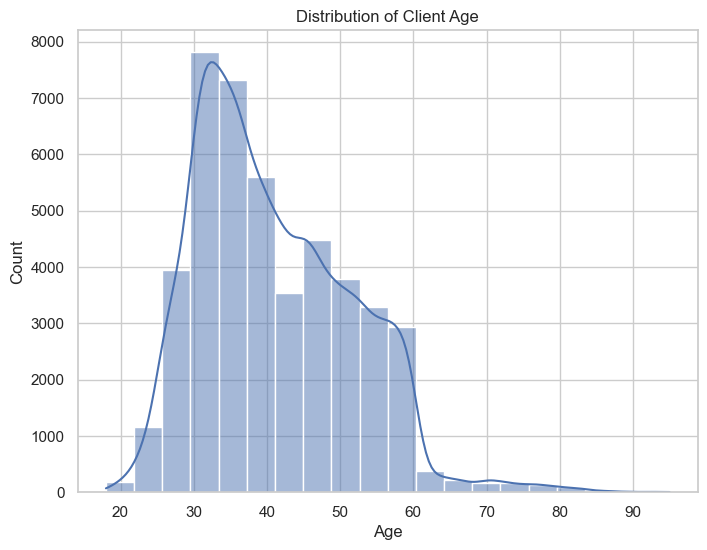

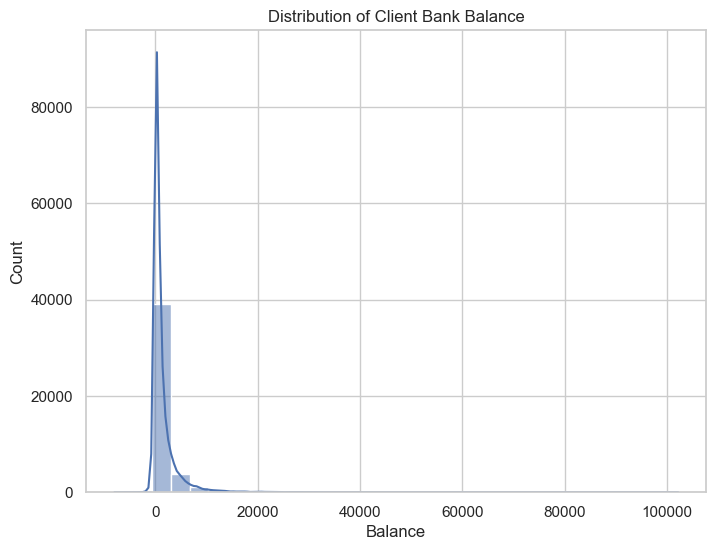

In [11]:



sns.set(style="whitegrid")

# Plotting distribution of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Client Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Plotting distribution of 'balance'
plt.figure(figsize=(8, 6))
sns.histplot(df['balance'], bins=30, kde=True)
plt.title('Distribution of Client Bank Balance')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()


The first plot shows the distribution of client ages, which appears to be slightly right-skewed, shows that most clients are in their mid-30s to mid-40s, with fewer older or younger clients.

The second plot shows the distribution of client bank balances. The distribution is heavily right-skewed, shows that most clients have a lower balance, but there are some clients with higher balances.

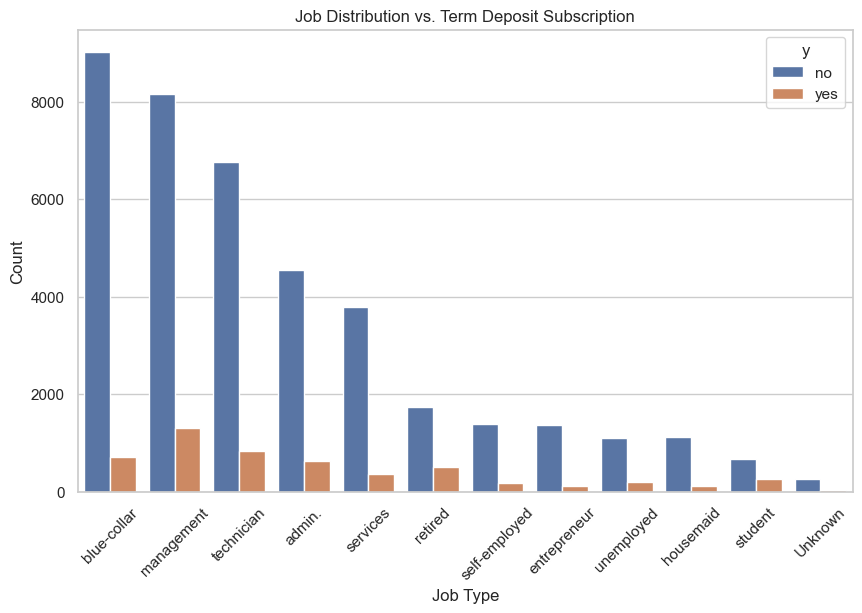

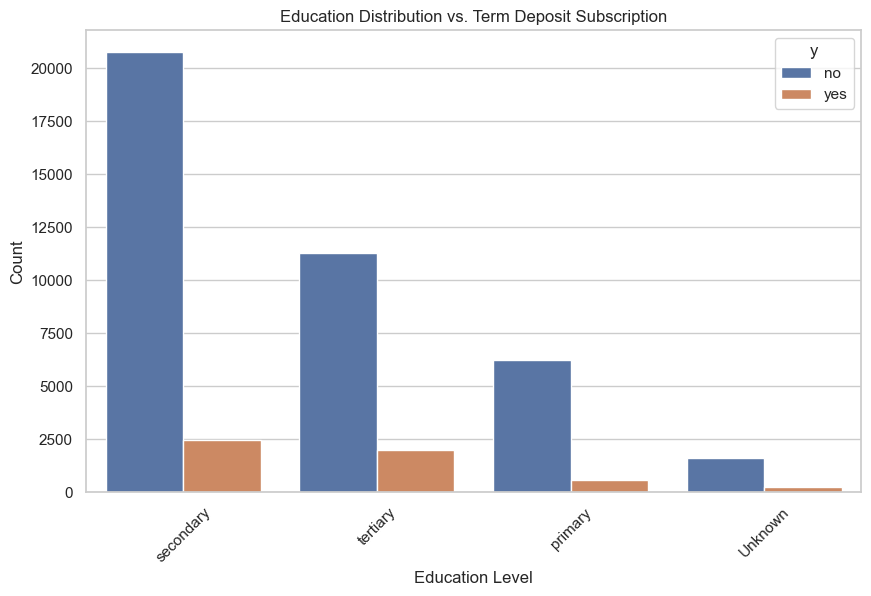

In [12]:
# Plotting the distribution of the 'job' feature and its relationship with the target variable 'y'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job', hue='y', order=df['job'].value_counts().index)
plt.title('Job Distribution vs. Term Deposit Subscription')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plotting the distribution of the 'education' feature and its relationship with the target variable 'y'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education', hue='y', order=df['education'].value_counts().index)
plt.title('Education Distribution vs. Term Deposit Subscription')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


The first plot shows the distribution of job types and their relationship to term deposit subscriptions (y). We observe that some job categories, such as "management" and "technician," have a higher count, but the subscription rates vary across jobs.

The second plot shows that the distribution of education levels and their relationship to the target variable. Clients with a university degree or professional course tend to have higher counts, but the subscription rates again differ across education levels.

### Descriptive and Inferential statistics

In [24]:
# Descriptive statistics for the numeric features in the dataset
descriptive_stats = df.describe()

# Displaying the descriptive statistics for the numeric columns
descriptive_stats


,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Age: The average age of clients is approximately 41 years, with a standard deviation of 10.62 years.
    
Balance: The average bank balance is €1,362, though there is a variation, as indicated by a standard deviation of €3,045.
    
Day: This shows the day of the month when clients were contacted, with an average around the 16th of the month.
    
Campaign: Clients were contacted on average 2.76 times during the campaign, with some outliers having been contacted as many as 63 times.
    
Duration: The average duration of the last contact call was 258 seconds, with substantial variation.
    
Pdays and Previous: These variables show that many clients were not contacted in previous campaigns (pdays = -1), and for those who were, the average time since their last contact is approximately 40 days.

In [25]:

# Inferential statistics - correlation for numeric features and chi-square tests for categorical features
# Correlation matrix for numeric features
correlation_matrix = df.corr()

# Chi-square test for independence between the categorical variable 'job' and the target 'y'
contingency_table = pd.crosstab(df['job'], df['y'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Displaying the correlation matrix and chi-square test result
correlation_matrix, (chi2, p)


/var/folders/w6/lgc1nk1n73zg3fpbgwxsqk4h0000gn/T/ipykernel_1233/3499446551.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


(               age   balance       day  duration  campaign     pdays  previous
 age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
 balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
 day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
 duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
 campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
 pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
 previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000,
 (836.1054877471965, 3.337121944935502e-172))

Correlation Matrix: Numeric features like age, balance, day, and others show low correlations with each other. None of the numeric features have a strong linear relationship with each other, with the highest being between pdays and previous (0.45). This shows that most of the numeric variables are fairly independent.

Chi-Square Test (Job vs Target): The chi-square test for independence between job and the target variable y yielded a chi-square statistic of 836.11 and a p-value close to zero (3.34e-172). This indicates a statistically relationship between the job type and whether a client subscribes to a term deposit.

### Data Preparation

In [20]:


# Encoding categorical features
df_encoded = df.copy()

# Applying Label Encoding to binary categorical columns
label_enc_cols = ['default', 'housing', 'loan', 'y']
le = LabelEncoder()
for col in label_enc_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    
# applying One-Hot Encoding
df_encoded = pd.get_dummies(df_encoded, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'], drop_first=True)

# Dropping the 'duration' 
df_encoded.drop(columns=['duration'], inplace=True)

# Splitting the data into features and target variable
X = df_encoded.drop(columns=['y'])
y = df_encoded['y']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scaling the numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled.shape, X_test_scaled.shape

((36168, 41), (9043, 41))

### Models Building

In [21]:

# Initializing the models
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
svm = SVC(random_state=42)

# Training the models
knn.fit(X_train_scaled, y_train)
decision_tree.fit(X_train_scaled, y_train)
logistic_regression.fit(X_train_scaled, y_train)
svm.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_knn = knn.predict(X_test_scaled)
y_pred_decision_tree = decision_tree.predict(X_test_scaled)
y_pred_logistic_regression = logistic_regression.predict(X_test_scaled)
y_pred_svm = svm.predict(X_test_scaled)

# Evaluating the models
knn_accuracy = accuracy_score(y_test, y_pred_knn)
decision_tree_accuracy = accuracy_score(y_test, y_pred_decision_tree)
logistic_regression_accuracy = accuracy_score(y_test, y_pred_logistic_regression)
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Displaying the accuracy scores
(knn_accuracy, decision_tree_accuracy, logistic_regression_accuracy, svm_accuracy)


(0.8896383943381622,
 0.8327988499391795,
 0.8935087913303107,
 0.8943934534999447)

In [22]:

print("Classification Report: KNN")
print(classification_report(y_test, y_pred_knn, target_names=['No', 'Yes']))

print("\nClassification Report: Decision Tree")
print(classification_report(y_test, y_pred_decision_tree, target_names=['No', 'Yes']))

print("\nClassification Report: Logistic Regression")
print(classification_report(y_test, y_pred_logistic_regression, target_names=['No', 'Yes']))

print("\nClassification Report: SVM")
print(classification_report(y_test, y_pred_svm, target_names=['No', 'Yes']))


Classification Report: KNN
              precision    recall  f1-score   support

          No       0.91      0.97      0.94      7985
         Yes       0.56      0.25      0.34      1058

    accuracy                           0.89      9043
   macro avg       0.74      0.61      0.64      9043
weighted avg       0.87      0.89      0.87      9043


Classification Report: Decision Tree
              precision    recall  f1-score   support

          No       0.91      0.90      0.90      7985
         Yes       0.30      0.32      0.31      1058

    accuracy                           0.83      9043
   macro avg       0.60      0.61      0.61      9043
weighted avg       0.84      0.83      0.84      9043


Classification Report: Logistic Regression
              precision    recall  f1-score   support

          No       0.90      0.99      0.94      7985
         Yes       0.67      0.18      0.28      1058

    accuracy                           0.89      9043
   macro avg       

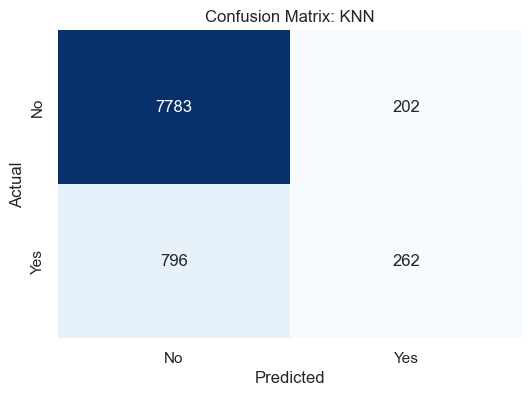

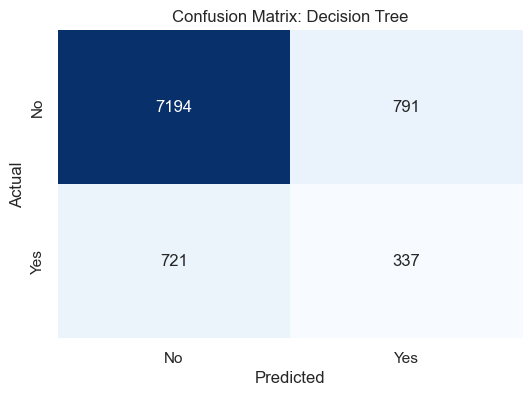

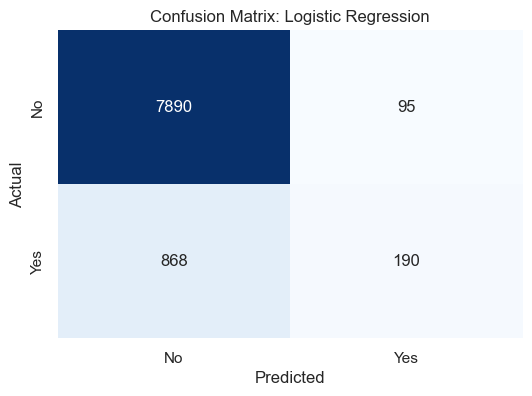

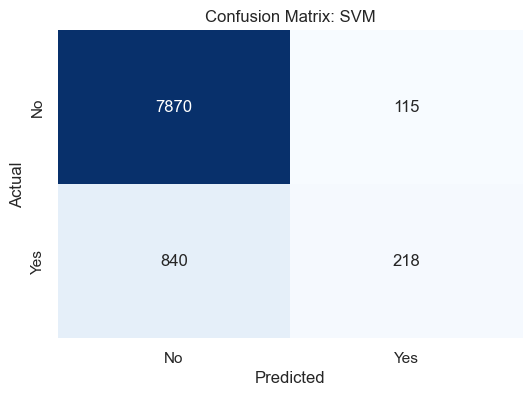

In [23]:



def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Plotting confusion matrices for all models
plot_confusion_matrix(y_test, y_pred_knn, 'KNN')
plot_confusion_matrix(y_test, y_pred_decision_tree, 'Decision Tree')
plot_confusion_matrix(y_test, y_pred_logistic_regression, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_svm, 'SVM')
